# Step 1: Load and Clean the Data
<h3 align='center'> Ensure that all missing values are handled and data types are correct. This step includes imputing missing values and converting columns to the appropriate data types.</h3>

Heatmap of the missing values:


<Axes: >

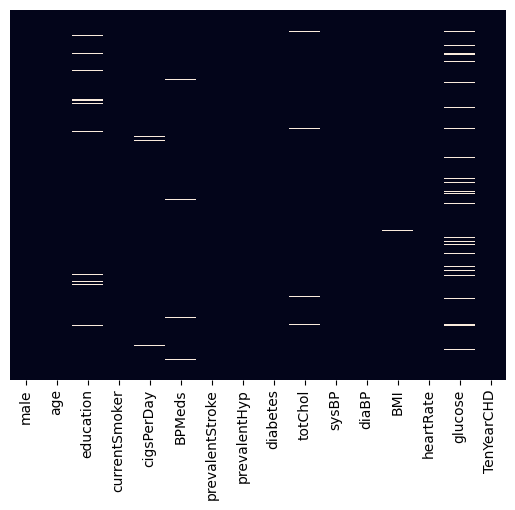

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/Users/pingu/Downloads/Heart_Disease.csv'
df = pd.read_csv(file_path)
df

#Heatmap before the data preprocessing
print('Heatmap of the missing values:')
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [3]:
# Fill missing values
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].mean())
df['BPMeds'] = df['BPMeds'].bfill()
df['prevalentStroke'] = df['prevalentStroke'].ffill()
df['prevalentHyp'] = df['prevalentHyp'].ffill()
df['diabetes'] = df['diabetes'].ffill()
df['totChol'] = df['totChol'].fillna(df['totChol'].mean())
df['sysBP'] = df['sysBP'].fillna(df['sysBP'].mean())
df['diaBP'] = df['diaBP'].fillna(df['diaBP'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].mean())
df['glucose'] = df['glucose'].fillna(df['glucose'].mean())
df['TenYearCHD'] = df['TenYearCHD'].ffill()

#Dropping unnecessary Columns
df = df.drop('education', axis = 1)

Heatmap after filling the missing values:


<Axes: >

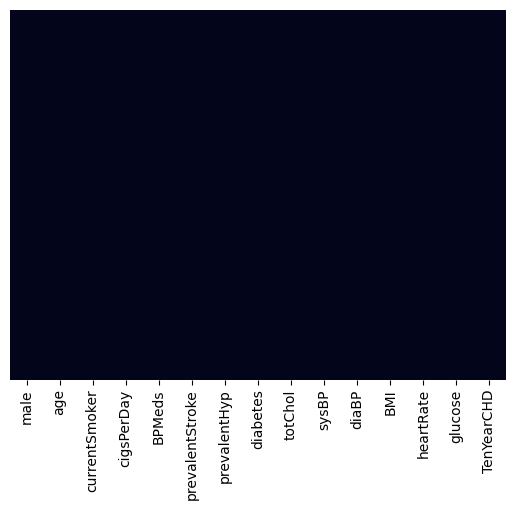

In [4]:
# Heatmap after filling missing Values
print('Heatmap after filling the missing values:')
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

# Step 2: Exploratory Data Analysis (EDA)
<h3 align='center'>Visualize the data distribution and relationships between features to gain insights.</h3>

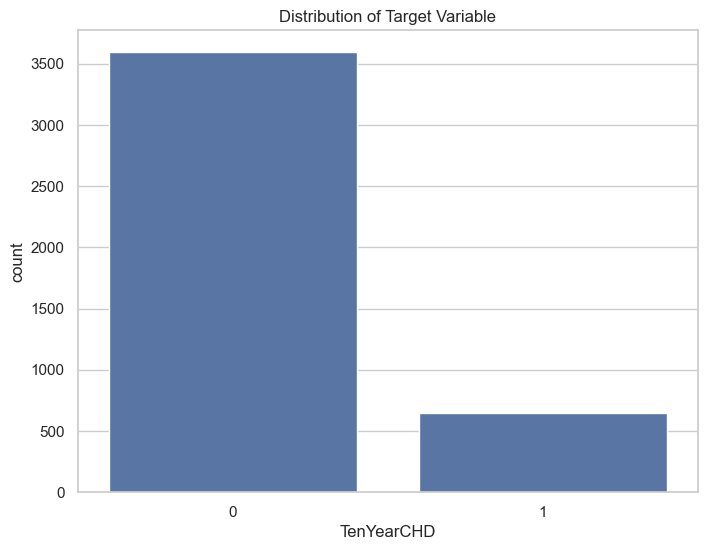

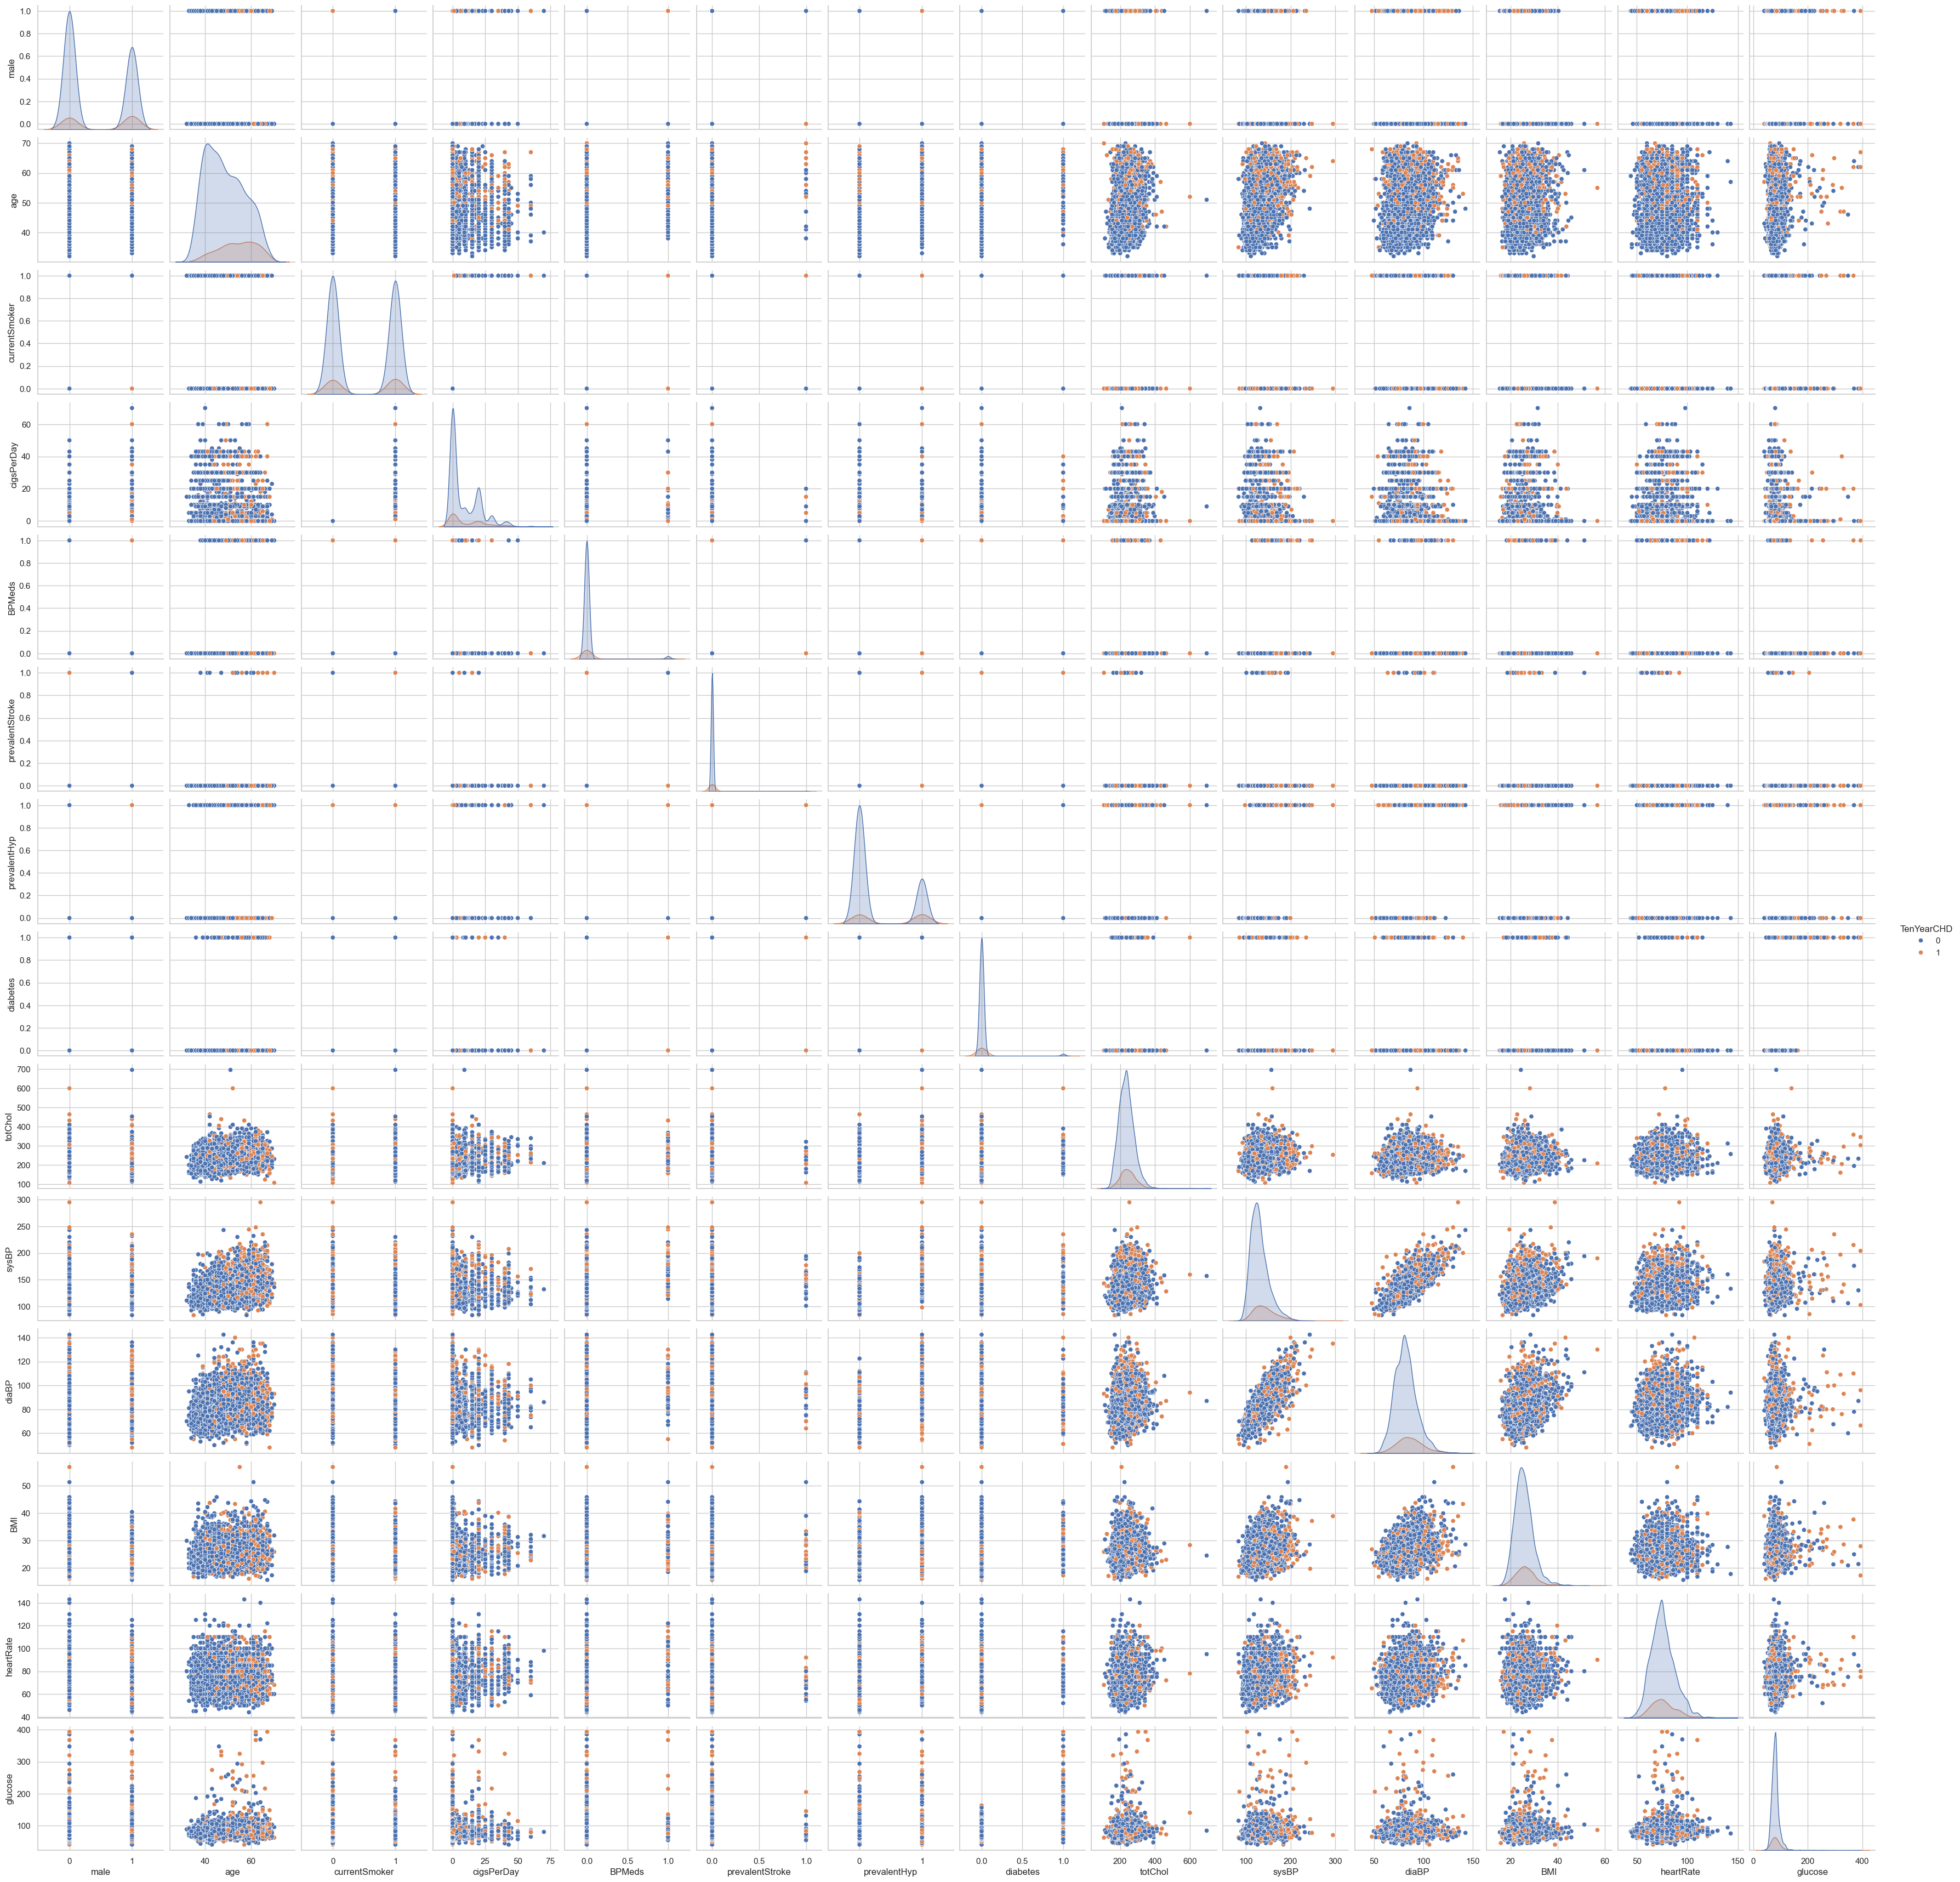

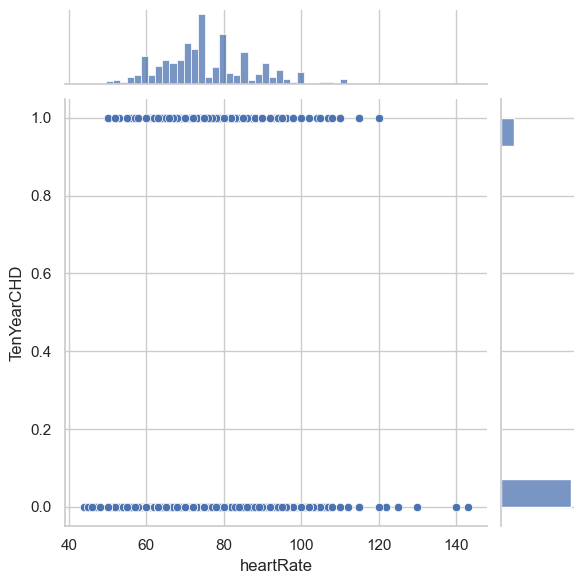

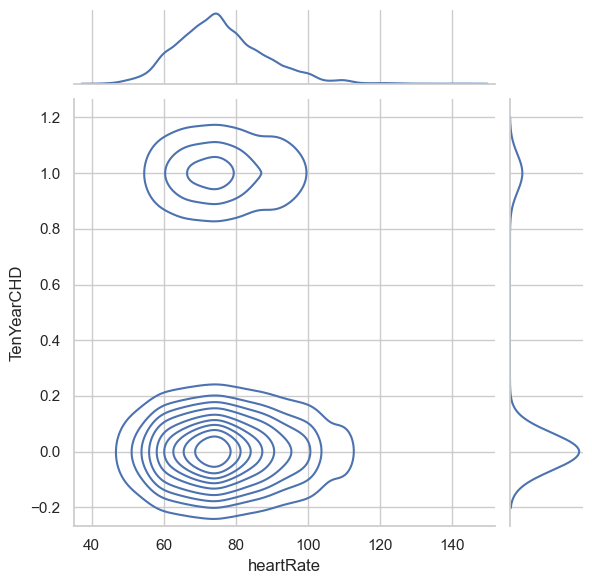

In [5]:
sns.set(style="whitegrid")

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='TenYearCHD', data=df)
plt.title('Distribution of Target Variable')
plt.show()

# Pairplot to visualize relationships between features
sns.pairplot(df, hue='TenYearCHD')
plt.show()

# Cor-relation of the dataset
hc=df.corr()
hc

#Jointplots
sns.jointplot(x='heartRate',y='TenYearCHD',data=df)
sns.jointplot(x='heartRate',y='TenYearCHD',data=df,kind='kde')
 

# Step 3: Feature Engineering
<h3 align='center'>Create new features or transform existing ones to improve the model's performance.</h3>

In [6]:
# Example of feature engineering: creating a new feature 'pulse_pressure'
df['pulse_pressure'] = df['sysBP'] - df['diaBP']

# Display the first few rows of the data with the new feature
df.head()

male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39              0         0.0     0.0                0   
1     0   46              0         0.0     0.0                0   
2     1   48              1        20.0     0.0                0   
3     0   61              1        30.0     0.0                0   
4     0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  pulse_pressure  
0           0            36.0  
1           0            40.0  
2           0            47.5  
3           1            55.0  
4           0            46.0

# Step 4: Model Building
<h3 align = 'center'>Train different machine learning models and compare their performances.</h3>

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Define the features and target variable
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of features to be used for training
feature_list = X_train.columns

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions
lr_y_pred = lr_model.predict(X_test)
rf_y_pred = rf_model.predict(X_test)


# Step 5: Model Evaluation
<h3 align='center'>Evaluate the models using various metrics and visualize the results.</h3>

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848



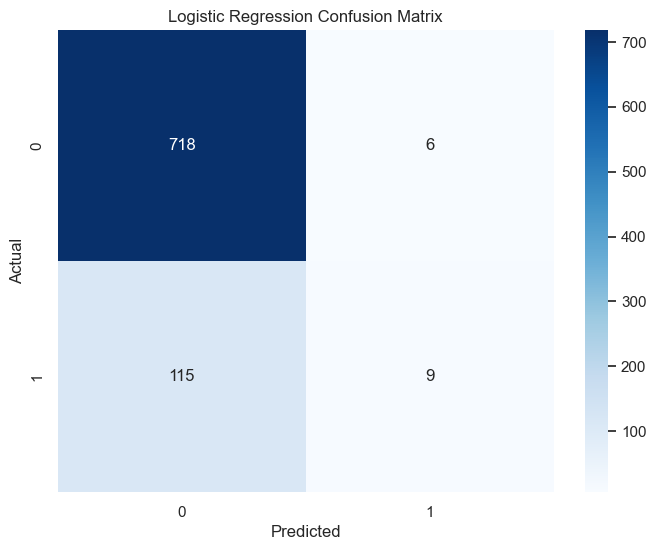

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       724
           1       0.35      0.06      0.10       124

    accuracy                           0.85       848
   macro avg       0.60      0.52      0.51       848
weighted avg       0.78      0.85      0.80       848



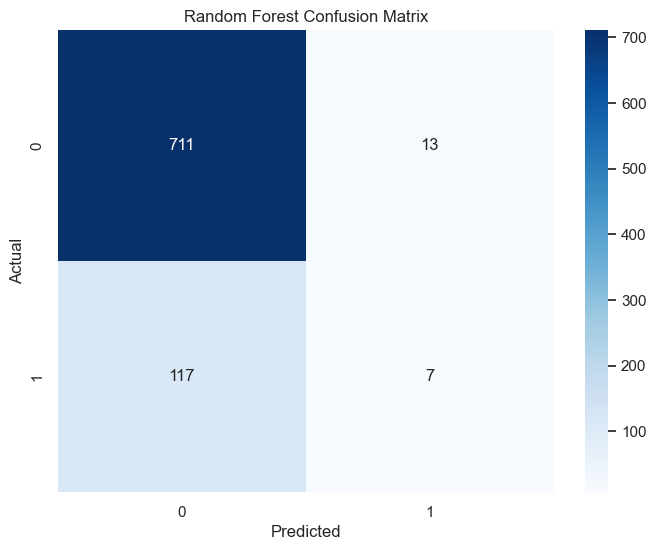

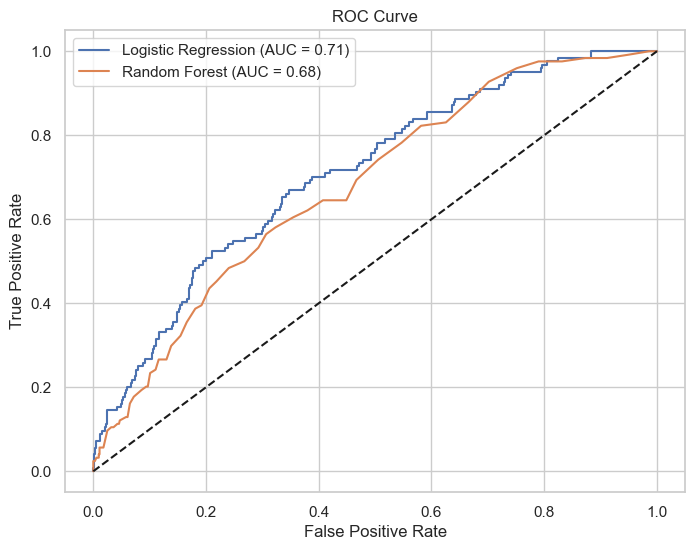

In [8]:
# Logistic Regression Evaluation
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_y_pred))

# Confusion Matrix for Logistic Regression
lr_conf_matrix = confusion_matrix(y_test, lr_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

# Confusion Matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve for both models
lr_y_pred_proba = lr_model.predict_proba(X_test)[:, 1]
rf_y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_y_pred_proba)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, lr_y_pred_proba)))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, rf_y_pred_proba)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Step 6: Prediction Function
<h3 align='center'>Create a function to input new data and predict if a person is affected by heart disease.</h3>

In [9]:
def predict_heart_disease(input_data):
    # Convert input data to DataFrame and ensure it has the same feature columns
    input_df = pd.DataFrame([input_data])
    
    # Add engineered feature
    input_df['pulse_pressure'] = input_df['sysBP'] - input_df['diaBP']
    
    # Ensure the input has the same features as the training data
    input_df = input_df[feature_list]
    
    # Standardize the features
    input_scaled = scaler.transform(input_df)
    
    # Make prediction (choose the best model based on your evaluation)
    prediction = rf_model.predict(input_scaled)
    
    return 'Affected by heart disease' if prediction[0] == 1 else 'Not affected by heart disease'

# Example input data
input_data = {
    'male': 0,
    'age': 50,
    'education': 1,
    'currentSmoker': 0,
    'cigsPerDay': 0,
    'BPMeds': 0,
    'prevalentStroke': 0,
    'prevalentHyp': 0,
    'diabetes': 0,
    'totChol': 200,
    'sysBP': 120,
    'diaBP': 80,
    'BMI': 25,
    'heartRate': 70,
    'glucose': 80
}

# Predict
print(predict_heart_disease(input_data))

Not affected by heart disease
